#### Component 2 : Distribution of IMLS grants - by NANDANA 

Concept: What is the distribution of IMLS grants, and what do these grants do?

Your second dataset will be the IMLS discretionary grants database. These grants include information about the topic of the grant, the institution that received it, its duration, and a few other pieces of data. You may also find useful and interesting data (especially related to zip codes and economic factors) at FRED.

Your visualization should be interactive. There are several frameworks you can use to do this. The three that we have discussed in detail in class have been using the IPython widgets interface to build small, exploratory visualizations, the Bokeh framework and Plotly. You may not use Tableau to build this visualization. If there is another framework you would like to use, please ask.

A few of the concepts that you may explore:

What types of grants are supported by IMLS?
How are these grants distributed across the United States? Are they particularly clustered in certain states?
Is there a relationship between the economic factors in a zip code and the grants from IMLS?
Generate from this data either a notebook that can be executed, a python script that can be executed, or a plotly dashboard that can be accessed. If you utilize plotly, at lease some of the plotly setup must be in a python script.

In [5]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import csv
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
import datetime
%matplotlib inline

In [6]:
grants=pd.read_csv("DiscGrants96to13.csv",parse_dates=['AwardDate'],encoding='latin-1')
grants.head()

,LogNumber,Institution,Program,ProgramType,ProjectTitle,ProjectType,AwardDate,InstAddr1,InstAddr2,InstAddr3,...,Longitude,FIPSState,FIPSCounty,CensusTract,CensusBlock,FIPSMCDCode,FIPSPlaceCode,CBSACode,MetroDivisionCode,Description
0,IA-00-00-0001-00,Museum of the Aleutians,Conservation Assessment Prog.,IA,NaN,Untitled,2000-03-30,P.O. Box 648,NaN,NaN,...,-166.536862,2.0,16.0,200.0,2014.0,1615.0,80770.0,NaN,NaN,NaN
1,IA-00-00-0002-00,"Depot Museum, Inc.",Conservation Assessment Prog.,IA,NaN,Untitled,2000-03-30,P.O. Box 681420,NaN,NaN,...,-85.694757,1.0,49.0,961000.0,2013.0,91206.0,27616.0,NaN,NaN,NaN
2,IA-00-00-0003-00,National Voting Rights Museum and Institute,Conservation Assessment Prog.,IA,NaN,Untitled,2000-03-30,6 Highway 80 East,NaN,NaN,...,-87.017024,1.0,47.0,957200.0,1005.0,92883.0,NaN,42820.0,NaN,NaN
3,IA-00-00-0004-00,Bob Jones Museum,Conservation Assessment Prog.,IA,NaN,Untitled,2000-03-30,P.O. Box 613,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,IA-00-00-0005-00,Coronado Museum of History and Art,Conservation Assessment Prog.,IA,NaN,Untitled,2000-03-30,1100 Orange Avenue,NaN,NaN,...,-117.170703,6.0,73.0,10900.0,1021.0,92780.0,16378.0,41740.0,NaN,NaN


In [7]:
grants.describe()



,AwardOrig,AwardTotal,AppMatchAmount,ReqAwardAmount,ReqMatchAmount,FiscalYear,AwardPeriodFr,AwardPeriodTo,Latitude,Longitude,FIPSState,FIPSCounty,CensusTract,CensusBlock,FIPSMCDCode,FIPSPlaceCode,CBSACode,MetroDivisionCode
count,1.321800e+04,1.321800e+04,1.002000e+04,1.321600e+04,1.272000e+04,13218.000000,0.0,0.0,13200.000000,13200.000000,13174.000000,13174.000000,13174.000000,13174.000000,13164.000000,10640.000000,10987.000000,2502.000000
mean,7.132206e+04,7.220064e+04,7.631695e+04,7.464080e+04,6.403963e+04,2003.753518,NaN,NaN,40.854648,-97.779590,26.864354,83.121755,273434.701078,2070.980492,67361.389015,41825.644267,30668.819514,31497.001599
std,1.613474e+05,1.644391e+05,1.820494e+05,1.934968e+05,1.756228e+05,4.885873,NaN,NaN,7.376833,23.195981,16.618937,110.521556,381966.006085,1133.819761,30508.764007,23654.987001,11545.089098,11218.556541
min,0.000000e+00,7.150000e+02,0.000000e+00,0.000000e+00,0.000000e+00,1996.000000,NaN,NaN,17.706759,-171.694808,1.000000,1.000000,100.000000,47.000000,100.000000,100.000000,10100.000000,11244.000000
25%,4.000000e+03,4.000000e+03,0.000000e+00,4.000000e+03,0.000000e+00,2000.000000,NaN,NaN,36.593410,-116.112793,10.000000,21.000000,2400.000000,1028.000000,44919.000000,20000.000000,19100.000000,17511.500000
50%,7.000000e+03,7.890000e+03,0.000000e+00,7.000000e+03,0.000000e+00,2003.000000,NaN,NaN,40.513250,-91.373070,27.000000,53.000000,21304.000000,2008.000000,90070.000000,45255.000000,33340.000000,35614.000000
75%,1.044952e+05,1.046532e+05,8.782875e+04,1.082408e+05,4.811475e+04,2008.000000,NaN,NaN,43.079877,-77.839409,40.000000,101.000000,562700.000000,3003.000000,92226.000000,60500.000000,40380.000000,37964.000000
max,1.000000e+07,1.000000e+07,3.575251e+06,1.125000e+07,3.575251e+06,2013.000000,NaN,NaN,70.252870,-64.798722,78.000000,840.000000,985600.000000,8002.000000,98000.000000,88900.000000,49780.000000,48864.000000


So, the average amount of the award is 7890. The highest amount is 10000000. And there are 13218 awards given out.

In [5]:
grants.dtypes

LogNumber                    object
Institution                  object
Program                      object
ProgramType                  object
ProjectTitle                 object
ProjectType                  object
AwardDate            datetime64[ns]
InstAddr1                    object
InstAddr2                    object
InstAddr3                    object
InstCity                     object
InstState                    object
InstZip                      object
AwardOrig                   float64
AwardTotal                  float64
AppMatchAmount              float64
ReqAwardAmount              float64
ReqMatchAmount              float64
Prefix                       object
FirstName                    object
LastName                     object
OrgType                      object
FiscalYear                    int64
AwardPeriodFr               float64
AwardPeriodTo               float64
OrgUnit                      object
OUAddr1                      object
OUAddr2                     

In [6]:
grants['ProjectType'].head()

0    Untitled
1    Untitled
2    Untitled
3    Untitled
4    Untitled
Name: ProjectType, dtype: object

In [10]:
projects = grants[['Program','ProgramType','AwardTotal','AwardDate']]
projects.head()

,Program,ProgramType,AwardTotal,AwardDate
0,Conservation Assessment Prog.,IA,3390.0,2000-03-30
1,Conservation Assessment Prog.,IA,6030.0,2000-03-30
2,Conservation Assessment Prog.,IA,6030.0,2000-03-30
3,Conservation Assessment Prog.,IA,6350.0,2000-03-30
4,Conservation Assessment Prog.,IA,6030.0,2000-03-30


In [74]:
orgs = grants[['OrgType','AwardTotal']]
end = orgs.groupby('OrgType')
end.AwardTotal.size()

OrgType
Aboretum                                    108
Academic Library                            214
Aquarium                                     59
Archive                                       6
Art museum                                  713
Children's/youth museum                     215
Community college                            14
Consortium                                   11
Education unit                               30
Ethnic organization (Amer Ind)             3519
Four-year college                           103
General museum                              347
Historic house/site                         198
History museum                              511
Institution of higher education             204
Library                                     111
Library association                          23
Library consortium                           38
Museum                                     3816
Museum Association                           66
Museum library                  

In [12]:

import plotly 




ModuleNotFoundError: No module named 'plotly.plotly'; 'plotly' is not a package

In [3]:
import plotly.plotly as py
from plotly.graph_objs import *
#py.sign_in('nallapu2', 'XU17vfzb0lgpfMItKs2h')
trace1 = {
  "y": ["Arboretum", "Academic Library", "Aquarium", "Archive", "Art Museum", "Children's/youth museum", 
        "Community college", "Consortium", "Education unit", "Ethnic organization (Amer Ind)", 
        "Four-year college", "General Museum", "Historic house/site", "History museum", "Institution of higher education",
        "Library","Library association","Library consortium","Museum","Museum Association", "Museum library",
        "Museum organization","Native unit","Natural history museum","Nature center","Other","Planetarium",
        "Private non-profit library","Professional association/Organization","Public Broadcasting Lic.-Both"
        "Public Broadcasting lic-TV","Public Library","Research library/archives","School library or school district",
        "School of library & information science","Science/technology museum","Special Library","Specialized museum",
        "State Library Administrative Agency","State library agency", "State museum agency","Zoo"],
        
  "x": [301583, 209487, 450207, None, 353986, 1464065, None, 912960, 1068259, 325607, 108832, 694311, 853633, 
        None, None, None, None, 2348972, None, 2022161, None, 244897, None, 954609, 
        None, None, None, None, None, None, None, None, None, 1387519,None, None, None, None,980091], 
  "name": "21st Century Museum Professiona", 
  "marker": {"color": "rgb(131, 186, 106)"},  
  "orientation": "h", 
  "type": "bar", 
  "uid": "e58139"
}
trace2 = {
 "y": ["Arboretum", "Academic Library", "Aquarium", "Archive", "Art Museum", "Children's/youth museum", 
        "Community college", "Consortium", "Education unit", "Ethnic organization (Amer Ind)", 
        "Four-year college", "General Museum", "Historic house/site", "History museum", "Institution of higher education",
        "Library","Library association","Library consortium","Museum","Museum Association", "Museum library",
        "Museum organization","Native unit","Natural history museum","Nature center","Other","Planetarium",
        "Private non-profit library","Professional association/Organization","Public Broadcasting Lic.-Both"
        "Public Broadcasting lic-TV","Public Library","Research library/archives","School library or school district",
        "School of library & information science","Science/technology museum","Special Library","Specialized museum",
        "State Library Administrative Agency","State library agency", "State museum agency","Zoo"],
        
  "x": [3390,3640,None,3640,4520,6370,None,None,7570,7570,None,9150,9510,10300,None,
        11380,None,None,14260,None,19600,22260,25130,27420,30590,39950,None,52140,
        None,None,None,None,75430,None,None,80520,
        136110,251930,None,None,5638580,6331454], 
  "name": "Conservation Assessment Prog.", 
  "marker": {"color": "rgb(168, 209, 152)"}, 
  "orientation": "h", 
  "type": "bar", 
  "uid": "04bff1"
}
trace3 = {
  "y": ["Arboretum", "Academic Library", "Aquarium", "Archive", "Art Museum", "Children's/youth museum", 
        "Community college", "Consortium", "Education unit", "Ethnic organization (Amer Ind)", 
        "Four-year college", "General Museum", "Historic house/site", "History museum", "Institution of higher education",
        "Library","Library association","Library consortium","Museum","Museum Association", "Museum library",
        "Museum organization","Native unit","Natural history museum","Nature center","Other","Planetarium",
        "Private non-profit library","Professional association/Organization","Public Broadcasting Lic.-Both"
        "Public Broadcasting lic-TV","Public Library","Research library/archives","School library or school district",
        "School of library & information science","Science/technology museum","Special Library","Specialized museum",
        "State Library Administrative Agency","State library agency", "State museum agency","Zoo"],
        
  "x": [1390137,1608932,560340,None,8413242,147999,3000,None,643283,15406,143369,3122232,
        990884,3887393,1134687,83719,None,None,12496484,None,22281,98933,113396,2989108,None,1029633,None,
        None,None,None,None,9000,257538,None,73486,324968,None,445646,None,2976,196614,2990394], 
  "name": "Conservation Program", 
  "type": "bar", 
  "uid": "5c68d1", 
  "orientation": "h"
}
trace4 = {
  "y": ["Arboretum", "Academic Library", "Aquarium", "Archive", "Art Museum", "Children's/youth museum", 
        "Community college", "Consortium", "Education unit", "Ethnic organization (Amer Ind)", 
        "Four-year college", "General Museum", "Historic house/site", "History museum", "Institution of higher education",
        "Library","Library association","Library consortium","Museum","Museum Association", "Museum library",
        "Museum organization","Native unit","Natural history museum","Nature center","Other","Planetarium",
        "Private non-profit library","Professional association/Organization","Public Broadcasting Lic.-Both"
        "Public Broadcasting lic-TV","Public Library","Research library/archives","School library or school district",
        "School of library & information science","Science/technology museum","Special Library","Specialized museum",
        "State Library Administrative Agency","State library agency", "State museum agency","Zoo"],
        
  "x": [1273500,None,787500,None,14502656,3981861,None,None,None,None,
        112500,5708842,2683006,7324821,787500,1026198,None,None,51857772,
        None,450000,665637,112500,3343823,439442,2070103,None,225000,
        278512,None,None,None,494808,None,None,3036062,None,3610749,3610749,None,None,337500,3239733], 
  "name": "General Operating Support", 
  "marker": {"color": "rgb(209, 230, 201)"}, 
  "orientation": "h", 
  "type": "bar", 
  "uid": "44c3e5"
}
trace5 = {
  "y": ["Arboretum", "Academic Library", "Aquarium", "Archive", "Art Museum", "Children's/youth museum", 
        "Community college", "Consortium", "Education unit", "Ethnic organization (Amer Ind)", 
        "Four-year college", "General Museum", "Historic house/site", "History museum", "Institution of higher education",
        "Library","Library association","Library consortium","Museum","Museum Association", "Museum library",
        "Museum organization","Native unit","Natural history museum","Nature center","Other","Planetarium",
        "Private non-profit library","Professional association/Organization","Public Broadcasting Lic.-Both"
        "Public Broadcasting lic-TV","Public Library","Research library/archives","School library or school district",
        "School of library & information science","Science/technology museum","Special Library","Specialized museum",
        "State Library Administrative Agency","State library agency", "State museum agency","Zoo"],
        
  "x": [299735,70541,2112520,None,None,724642,None,None,None,None,None,
        1072351,206211,2296950,149877,341424,None,None,5397092,None,224900,149251,
        None,449112,None,28756,None,28432,9140,150000,None,23300,None,None,None,
        629768,None,280784,None,None,166229,271098], 
  "name": "Learning Opportunities Grants", 
  "marker": {"color": "rgb(25, 25, 1120)"}, 
  "orientation": "h", 
  "type": "bar", 
  "uid": "0ce36f"
}
trace6 = {
  "y": ["Arboretum", "Academic Library", "Aquarium", "Archive", "Art Museum", "Children's/youth museum", 
        "Community college", "Consortium", "Education unit", "Ethnic organization (Amer Ind)", 
        "Four-year college", "General Museum", "Historic house/site", "History museum", "Institution of higher education",
        "Library","Library association","Library consortium","Museum","Museum Association", "Museum library",
        "Museum organization","Native unit","Natural history museum","Nature center","Other","Planetarium",
        "Private non-profit library","Professional association/Organization","Public Broadcasting Lic.-Both"
        "Public Broadcasting lic-TV","Public Library","Research library/archives","School library or school district",
        "School of library & information science","Science/technology museum","Special Library","Specialized museum",
        "State Library Administrative Agency","State library agency", "State museum agency","Zoo"], 
  "x": [888665,19002253,1534769,489880,164031,None,405223,1298931,3777652,None,20227184,None,2054518,
        None,23690925,1180327,6687184,6584227,None,None,None,199648,None,
        8617534,None,21484113,None,None,4378757,None,None,6424831,
        17473149,2834361,34434296,2510171,409540,None,None,10408578,None,None], 
  "name": "Librarians for the 21st Century", 
   "marker": {"color": "rgb(150, 182, 199)"},  
  "orientation": "h", 
  "type": "bar", 
  "uid": "60cb54"
}
trace7 = {
  "y": ["Arboretum", "Academic Library", "Aquarium", "Archive", "Art Museum", "Children's/youth museum", 
        "Community college", "Consortium", "Education unit", "Ethnic organization (Amer Ind)", 
        "Four-year college", "General Museum", "Historic house/site", "History museum", "Institution of higher education",
        "Library","Library association","Library consortium","Museum","Museum Association", "Museum library",
        "Museum organization","Native unit","Natural history museum","Nature center","Other","Planetarium",
        "Private non-profit library","Professional association/Organization","Public Broadcasting Lic.-Both"
        "Public Broadcasting lic-TV","Public Library","Research library/archives","School library or school district",
        "School of library & information science","Science/technology museum","Special Library","Specialized museum",
        "State Library Administrative Agency","State library agency", "State museum agency","Zoo"], 
  "x": [32225,7640,3550,1775,140185,48790,None,None,None,23252325,112441,53770,
        130445,20835,25525,None,None,2649005,3536624,13495,4745,None,38750,7070,
        33110,None,1775,None,None,None,2325,6270,None,None,
        29160,None,45485,None,None,5075,1775],
  "marker": {"color": "rgb(112, 128, 144)"},
  "name": "Museum Assessment Program", 
  "type": "bar", 
  "uid": "9fa287", 
  "orientation": "h"
}
trace8 = {
  "y": ["Arboretum", "Academic Library", "Aquarium", "Archive", "Art Museum", "Children's/youth museum", 
        "Community college", "Consortium", "Education unit", "Ethnic organization (Amer Ind)", 
        "Four-year college", "General Museum", "Historic house/site", "History museum", "Institution of higher education",
        "Library","Library association","Library consortium","Museum","Museum Association", "Museum library",
        "Museum organization","Native unit","Natural history museum","Nature center","Other","Planetarium",
        "Private non-profit library","Professional association/Organization","Public Broadcasting Lic.-Both"
        "Public Broadcasting lic-TV","Public Library","Research library/archives","School library or school district",
        "School of library & information science","Science/technology museum","Special Library","Specialized museum",
        "State Library Administrative Agency","State library agency", "State museum agency","Zoo"], 
  "x": [None,173093,None,None,796970,None,None,None,None,None,
        446775,1317434,1263820,2703216,170841,None,None,None,None,None,
        None,None,None,None,None,361201,None,None,None,None,
        None,118748,48525,None,None,None,None,1298386,None,None,149601,None], 
  "marker": {"color": "rgb(0 ,255, 255)"},
  "name": "Museum Grants African American", 
  "type": "bar", 
  "uid": "603090", 
  "visible": True
}
trace9 = {
  "y": ["Arboretum", "Academic Library", "Aquarium", "Archive", "Art Museum", "Children's/youth museum", 
        "Community college", "Consortium", "Education unit", "Ethnic organization (Amer Ind)", 
        "Four-year college", "General Museum", "Historic house/site", "History museum", "Institution of higher education",
        "Library","Library association","Library consortium","Museum","Museum Association", "Museum library",
        "Museum organization","Native unit","Natural history museum","Nature center","Other","Planetarium",
        "Private non-profit library","Professional association/Organization","Public Broadcasting Lic.-Both"
        "Public Broadcasting lic-TV","Public Library","Research library/archives","School library or school district",
        "School of library & information science","Science/technology museum","Special Library","Specialized museum",
        "State Library Administrative Agency","State library agency", "State museum agency","Zoo"], 
  "x": [None,None,42888,None,227359,131457,None,None,None,None,None,43953,
        23700,273839,None,38997,None,None,3968811,104000,None,None,None,74730,None,99100,
        None,None,50000,None,None,None,None,None,79971,75316,None,77573,None,None,None,75170], 
  "name": "Museum Leadership Initiatives", 
  "type": "bar", 
  "uid": "8c5771", 
  "orientation": "h"
}
trace10 = {
  "y": ["Arboretum", "Academic Library", "Aquarium", "Archive", "Art Museum", "Children's/youth museum", 
        "Community college", "Consortium", "Education unit", "Ethnic organization (Amer Ind)", 
        "Four-year college", "General Museum", "Historic house/site", "History museum", "Institution of higher education",
        "Library","Library association","Library consortium","Museum","Museum Association", "Museum library",
        "Museum organization","Native unit","Natural history museum","Nature center","Other","Planetarium",
        "Private non-profit library","Professional association/Organization","Public Broadcasting Lic.-Both"
        "Public Broadcasting lic-TV","Public Library","Research library/archives","School library or school district",
        "School of library & information science","Science/technology museum","Special Library","Specialized museum",
        "State Library Administrative Agency","State library agency", "State museum agency","Zoo"], 
  "x": [4899935,4521418,3969835,None,25789112,12338404,None,None,1132814,402747,
        1432384,9666619,6092038,14468455,3941736,907281,None,None,35853167,None,
        714638,1633627,6867706,504665,None,4877759,54610,140140,None,None,None,60727,
        1508363,None,439162,7439374,180640,3804222,None,78439,260010,4421599], 
  "name": "Museums for America", 
  "type": "bar", 
  "uid": "ddf793", 
  "orientation": "h"
}
trace11 = {
  "y": ["Arboretum", "Academic Library", "Aquarium", "Archive", "Art Museum", "Children's/youth museum", 
        "Community college", "Consortium", "Education unit", "Ethnic organization (Amer Ind)", 
        "Four-year college", "General Museum", "Historic house/site", "History museum", "Institution of higher education",
        "Library","Library association","Library consortium","Museum","Museum Association", "Museum library",
        "Museum organization","Native unit","Natural history museum","Nature center","Other","Planetarium",
        "Private non-profit library","Professional association/Organization","Public Broadcasting Lic.-Both"
        "Public Broadcasting lic-TV","Public Library","Research library/archives","School library or school district",
        "School of library & information science","Science/technology museum","Special Library","Specialized museum",
        "State Library Administrative Agency","State library agency", "State museum agency","Zoo"], 
  "x": [1944523,31498838,2676891,323642,15927097,6629211,1755483, 632487,3220815,
        10574933, 5081657, 1560987,19941311,23819743.7,12936295,2591201,6032922, 2620597,4482249,703728,4989769,
        7495704,45500,22887981,107835,100000,3582364,475027,243450,18027651,7741895,1661095,16979791,9192595,
        1187112,3546984,536994,4996452,1402281,9474364], 
  "name": "National Leadership Grant", 
  "type": "bar", 
  "uid": "afc4b3", 
  "orientation": "h"
}


trace12 = {
  "y": ["Arboretum", "Academic Library", "Aquarium", "Archive", "Art Museum", "Children's/youth museum", 
        "Community college", "Consortium", "Education unit", "Ethnic organization (Amer Ind)", 
        "Four-year college", "General Museum", "Historic house/site", "History museum", "Institution of higher education",
        "Library","Library association","Library consortium","Museum","Museum Association", "Museum library",
        "Museum organization","Native unit","Natural history museum","Nature center","Other","Planetarium",
        "Private non-profit library","Professional association/Organization","Public Broadcasting Lic.-Both"
        "Public Broadcasting lic-TV","Public Library","Research library/archives","School library or school district",
        "School of library & information science","Science/technology museum","Special Library","Specialized museum",
        "State Library Administrative Agency","State library agency", "State museum agency","Zoo"], 
  "x": [None,None,None,None,None,None,None,None,None,5039872,None,None,None,None,None,None,
        None,None,None,None,None,None,None,None,None,239530,None,None,None,None,None,
        1209438,None,None,None,378481,None,None,None,None,None,459147], 
  "name": "Native Am. Enhancement Grants", 
  "type": "bar", 
  "uid": "37661e", 
  "orientation": "h"
}
trace13 = {
  "y": ["Arboretum", "Academic Library", "Aquarium", "Archive", "Art Museum", "Children's/youth museum", 
        "Community college", "Consortium", "Education unit", "Ethnic organization (Amer Ind)", 
        "Four-year college", "General Museum", "Historic house/site", "History museum", "Institution of higher education",
        "Library","Library association","Library consortium","Museum","Museum Association", "Museum library",
        "Museum organization","Native unit","Natural history museum","Nature center","Other","Planetarium",
        "Private non-profit library","Professional association/Organization","Public Broadcasting Lic.-Both"
        "Public Broadcasting lic-TV","Public Library","Research library/archives","School library or school district",
        "School of library & information science","Science/technology museum","Special Library","Specialized museum",
        "State Library Administrative Agency","State library agency", "State museum agency","Zoo"], 
  "x": [None,None,None,None,None,None,None,None,None,384000,None,None,
        None,None,None,None,None,None,None,None,2000,None,None,None,
        None,8000,None,None,None,None,None,None,None,None,None,None,None,2000,None,None,None,None], 
  "name": "Native Amer. Tech. Assistance", 
  "type": "bar", 
  "uid": "a29d51", 
  "orientation": "h"
}
trace14 = {
  "y": ["Arboretum", "Academic Library", "Aquarium", "Archive", "Art Museum", "Children's/youth museum", 
        "Community college", "Consortium", "Education unit", "Ethnic organization (Amer Ind)", 
        "Four-year college", "General Museum", "Historic house/site", "History museum", "Institution of higher education",
        "Library","Library association","Library consortium","Museum","Museum Association", "Museum library",
        "Museum organization","Native unit","Natural history museum","Nature center","Other","Planetarium",
        "Private non-profit library","Professional association/Organization","Public Broadcasting Lic.-Both"
        "Public Broadcasting lic-TV","Public Library","Research library/archives","School library or school district",
        "School of library & information science","Science/technology museum","Special Library","Specialized museum",
        "State Library Administrative Agency","State library agency", "State museum agency","Zoo"], 
  "x": [None,None,None,None,None,None,None,None,None,3532000,None,16500,None,
        None,None,None,None,None,None,None,16500,None,20500,None,4000,16500,
        None,None,None,None,None,365850,
        None,None,None,None,None,16500,None,None,None,None], 
  "name": "Native American Basic Grants", 
  "type": "bar", 
  "uid": "1f5a32", 
  "orientation": "h"
}

trace15 = {
  "y": ["Arboretum", "Academic Library", "Aquarium", "Archive", "Art Museum", "Children's/youth museum", 
        "Community college", "Consortium", "Education unit", "Ethnic organization (Amer Ind)", 
        "Four-year college", "General Museum", "Historic house/site", "History museum", "Institution of higher education",
        "Library","Library association","Library consortium","Museum","Museum Association", "Museum library",
        "Museum organization","Native unit","Natural history museum","Nature center","Other","Planetarium",
        "Private non-profit library","Professional association/Organization","Public Broadcasting Lic.-Both"
        "Public Broadcasting lic-TV","Public Library","Research library/archives","School library or school district",
        "School of library & information science","Science/technology museum","Special Library","Specialized museum",
        "State Library Administrative Agency","State library agency", "State museum agency","Zoo"], 
  "x": [None,None,None,None,None,None,None,None,None,
        31541207.5,None,68000,None,None,None,None,None,None,None,
        None,44000,None,1992611,None,66000,504355,None,None,None,None,
        None,5246563,None,None,None,None,None,169786,None,None,None,None], 
  "name": "Native American Library Service", 
  "type": "bar", 
  "uid": "1f5a32", 
  "orientation": "h"
}
trace16 = {
  "y": ["Arboretum", "Academic Library", "Aquarium", "Archive", "Art Museum", "Children's/youth museum", 
        "Community college", "Consortium", "Education unit", "Ethnic organization (Amer Ind)", 
        "Four-year college", "General Museum", "Historic house/site", "History museum", "Institution of higher education",
        "Library","Library association","Library consortium","Museum","Museum Association", "Museum library",
        "Museum organization","Native unit","Natural history museum","Nature center","Other","Planetarium",
        "Private non-profit library","Professional association/Organization","Public Broadcasting Lic.-Both"
        "Public Broadcasting lic-TV","Public Library","Research library/archives","School library or school district",
        "School of library & information science","Science/technology museum","Special Library","Specialized museum",
        "State Library Administrative Agency","State library agency", "State museum agency","Zoo"], 
  "x": [None,None,None,None,None,None,None,None,None,6072186,
        None,None,None,None,None,None,None,None,None,None,
        119994,None,1171794,None,201518,50000,None,None,None,None,
        None,20000,
        None,None,None,None,None,67916,None,None,None,None], 
  "name": "Native American Native Hawaiian", 
  "type": "bar", 
  "uid": "1f5a32", 
  "orientation": "h"
}
trace17 = {
  "y": ["Arboretum", "Academic Library", "Aquarium", "Archive", "Art Museum", "Children's/youth museum", 
        "Community college", "Consortium", "Education unit", "Ethnic organization (Amer Ind)", 
        "Four-year college", "General Museum", "Historic house/site", "History museum", "Institution of higher education",
        "Library","Library association","Library consortium","Museum","Museum Association", "Museum library",
        "Museum organization","Native unit","Natural history museum","Nature center","Other","Planetarium",
        "Private non-profit library","Professional association/Organization","Public Broadcasting Lic.-Both"
        "Public Broadcasting lic-TV","Public Library","Research library/archives","School library or school district",
        "School of library & information science","Science/technology museum","Special Library","Specialized museum",
        "State Library Administrative Agency","State library agency", "State museum agency","Zoo"], 
  "x": [None,None,None,None,55000,94115,None,None,None,None,
        None,None,None,5000,None,None,None,None,51128,657551,
        None,479030,None,None,None,87750,None,None,574500,None,
        None,None,None,None,None,None,None,None,None,None,None,None], 
   "marker": {"color": "rgb(255, 222, 173 )"},
  "name": "Professional Practices",
  "type": "bar",
  "uid": "1f5a32", 
  "orientation": "h"
}
trace18 = {
  "y": ["Arboretum", "Academic Library", "Aquarium", "Archive", "Art Museum", "Children's/youth museum", 
        "Community college", "Consortium", "Education unit", "Ethnic organization (Amer Ind)", 
        "Four-year college", "General Museum", "Historic house/site", "History museum", "Institution of higher education",
        "Library","Library association","Library consortium","Museum","Museum Association", "Museum library",
        "Museum organization","Native unit","Natural history museum","Nature center","Other","Planetarium",
        "Private non-profit library","Professional association/Organization","Public Broadcasting Lic.-Both"
        "Public Broadcasting lic-TV","Public Library","Research library/archives","School library or school district",
        "School of library & information science","Science/technology museum","Special Library","Specialized museum",
        "State Library Administrative Agency","State library agency", "State museum agency","Zoo"], 
  "x": [None,1110085,None,None,60000,None,None,None,450000,None,
        292482,2012099,554500,2831518,979025,129632,None,None,1183500,
        None,None,97550,None,None,None,670000,None,None,None,None,None,None,
        152000,None,None,None,None,480000,None,128683,519000,None], 
    
     "marker": {"color": "rgb(255, 222, 2 )"},
  "name": "Save America's Treasures", 
  "type": "bar", 
  "uid": "1f5a32", 
  "orientation": "h"
}
data = Data([trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8, trace9, trace10, 
             trace11, trace12, trace13, trace14, trace15, trace16, trace17, trace18])

layout = {
  "annotations": [
    {
      "x": 0.437384898711, 
      "y": -0.0529197080292, 
      "font": {
        "family": "Droid Serif, serif", 
        "size": 14
      }, 
      "showarrow": False, 
      "text": "Program Type", 
      "xref": "paper", 
      "yref": "paper"
    }, 
],
  "autosize": False, 
  "barmode": "stack", 
  "height": 812, 
  "legend": {
    "x": 0.597512416026, 
    "y": 0.552581546358, 
    "font": {"family": "Droid Serif, serif"}, 
    "xanchor": "left"
  }, 
  "margin": {
    "r": 2, 
    "t": 18, 
    "b": 17, 
    "l": 50
  }, 
  "showlegend": True, 
  "width": 900, 
  "xaxis": {
      "anchor": "y", 
    "autorange": False, 
    "autotick": False,
    "autorange": True, 
    "range": [0, 50000000.7368421], 
    "showgrid": False, 
    "showline": True, 
    "tickfont": {"family": "Droid Serif, serif"}, 
    "tickprefix": "$", 
    "ticks": "outside", 
    "title": "Click to enter X axis title"
  }, 
  "yaxis": {
    "autorange": True, 
    "range": [-0.5, 60.5], 
    "showgrid": True, 
    "tickfont": {
      "family": "Droid Serif, serif", 
      "size": 8
    }, 
    "type": "category"
  }
}
fig = Figure(data=data, layout=layout)
#plot_url = py.plot(fig)
py.iplot(fig)

ModuleNotFoundError: No module named 'plotly.plotly'; 'plotly' is not a package

This representation shows multiple lines for each ProgramType. In order to understand purchasing patterns, 
let’s group all the ProgramTypes by name. 
We can also look at the number of entries per ProgramType to get an idea for the distribution.

In [65]:
proj_group = projects.groupby('Program')

proj_group.AwardTotal.size()

Program
21st Century Museum Professiona      64
Conservation Assessment Prog.      1397
Conservation Program               1121
General Operating Support          1299
Learning Opportunities Grants       168
Librarians for the 21st Century     388
Museum Assessment Program          1731
Museum Grants African American       91
Museum Leadership Initiatives        57
Museums for America                1673
NLG/Education and Training           23
NLG/Museum Library Collab            30
NLG/Museums in Community             10
NLG/Preserv or Digitization          29
NLG/Professional Services            13
NLG/Research and Demo                17
NLG/Technology & Mus. On Line        13
National Leadership Grants          810
National Leadership Grants (LL)      97
National Leadership Grants - Mu      18
Native Am. Enhancement Grants        51
Native Amer. Tech. Assistance       198
Native American Basic Grants        846
Native American Library Service    2681
Native American Native Hawaiian 

So, here we can see that 'Museum Assessment Prog.' Program Type got the highest number of grants, 
whereas 'NLG/Museums in Community' type of Program got the lowest number of grants.

Now that our data is in a simple format to manipulate, let’s determine how much each program got during our time frame. The sum function allows us to quickly sum up all the values by program type. We can also sort the data using the sort command

In [150]:
import plotly.plotly as py
from plotly.graph_objs import *
trace1 = {
  "y": ["21st Century Museum Professiona","Conservation Assessment Prog.","Conservation Program ",
        "General Operating Support","Learning Opportunities Grants","Librarians for the 21st Century", 
        "Museum Assessment Program","Museum Grants African American","Museum Leadership Initiatives ",
        "Museums for America" ,"NLG/Education and Training",         
        "NLG/Museum Library Collab","NLG/Museums in Community", "NLG/Preserv or Digitization", "NLG/Professional Services",           
        "NLG/Research and Demo","NLG/Technology & Mus. On Line","National Leadership Grants","National Leadership Grants (LL)"    
        "National Leadership Grants - Mu","Native Am. Enhancement Grants","Native Amer. Tech. Assistance"       
        "Native American Basic Grants","Native American Library Service","Native American Native Hawaiian",
        "Professional Practices","Save America's Treasures"],      
  "x" : [64,1397,1121,1299,168,388,1731,91,57,1673,23,30,10,29,13,17,13,810,97,18,51,198,846,2681,220,102,71],
  "marker": {"color": ["#A0522D", "#1E90FF", "#67E568","#FF69B4","#08420D","#FFF000","#9932CC",
                       "#E56124","#E53E30","#7F2353","#CD5C5C","#9F8CA6","#84d44b","#1fa088","#fde725",
                       "#5ec962","#26828e"]}, 
  "name": "", 
  "orientation": "h", 
  "type": "bar", 
  "uid": "0ce36f"
}
data = Data([trace1])
layout = {
  "title": "Number of grants for each Program Type", 
  "xaxis": {
    "showticklabels": True, 
    "title": "Number of grants", 
    "titlefont": {
      "color": "#7f7f7f", 
      "family": "Arial, sans-serif", 
      "size": 14
    }
  }, 
    "margin": {
    "r": 2, 
    "t": 18, 
    "b": 17, 
    "l": 150
  },
  "yaxis": {
    "showticklabels": True, 
    "title": "Program Types", 
    "titlefont": {
      "color": "#7f7f7f", 
      "family": "Arial, sans-serif", 
      "size": 14
    }
  }
}
fig = Figure(data=data, layout=layout)
#plot_url = py.plot(fig)
py.iplot(fig)

In [139]:
sta_group = a.groupby('InstState')

sta_group.AwardTotal.size()

InstState
AK     948
AL      95
AR      51
AS       1
AZ     302
CA    1407
CO     234
CT     230
DC     144
DE      58
FL     324
FM       2
GA     128
GU       3
HI      89
IA     128
ID      47
IL     443
IN     152
KS     125
KY     116
LA     127
MA     528
MD     243
ME     203
MH       1
MI     427
MN     222
MO     174
MP       2
MS      50
MT     221
NC     267
ND      83
NE     137
NH     102
NJ      97
NM     320
NV     177
NY    1010
OH     260
OK     488
OR     241
PA     531
PR      20
PW       3
RI      64
SC      89
SD     139
TN     159
TX     393
UT     137
VA     265
VI      10
VT      91
WA     506
WI     313
WV      27
WY      62
dtype: int64

NY state has the highest number of grants, no wonder because it has about 83 museums 
of the 35000 museums funded by IMLS

In [16]:
totals = proj_group.sum()
totals

,AwardTotal
Program,
21st Century Museum Professiona,14883894.0
Conservation Assessment Prog.,14442644.0
Conservation Program,46041394.0
General Operating Support,108877629.0
Learning Opportunities Grants,15314815.0
Librarians for the 21st Century,198999539.0
Museum Assessment Program,7379235.0
Museum Grants African American,9545795.0
Museum Leadership Initiatives,1995138.0


In [16]:
totals.sort(columns='AwardTotal')

/Users/mittu/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,AwardTotal
ProgramType,
LT,396000.0
IL,1995138.0
IS,2004074.0
LI,3988350.0
LE,6488840.0
IM,7379235.0
MN,8592999.0
MH,9545795.0
IA,14442644.0


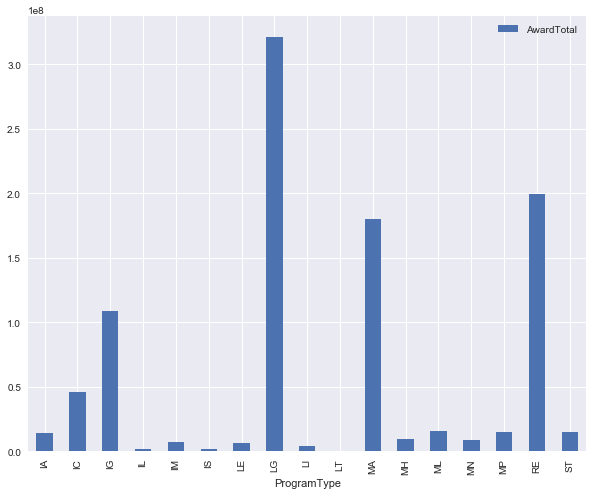

In [17]:

my_plot = totals.plot(kind='bar',figsize = (10,8) )

LG seems to have the highest Grant sum, whereas LT seems to have got the lowest

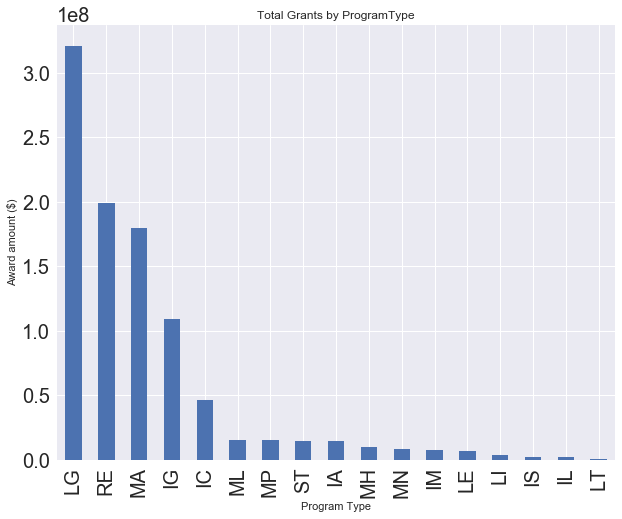

In [29]:
import matplotlib
matplotlib.rcParams.update({'font.size': 22})
my_plot = totals.sort_values(by='AwardTotal',ascending=False).plot(kind='bar',legend=None,title="Total Grants by ProgramType",figsize = (10,8))
my_plot.set_xlabel("Program Type")
my_plot.set_ylabel("Award amount ($)")
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 


So, we're right. LG has the lion's share while LT has the smallest, This actually tells us how much difference there is between their LG grants and LT grants.

In [146]:
import plotly 
import plotly.plotly as py
from plotly.graph_objs import *
plotly.tools.set_credentials_file(username='nallapu2', api_key='XU17vfzb0lgpfMItKs2h')
plotly.tools.set_config_file(world_readable=True,
                             sharing='public')

py.sign_in('nallapu2', 'XU17vfzb0lgpfMItKs2h')
trace1 = {
  "x": ["LT","IL","IS","LI","LE","IM","MN","MH","IA","ST","MP","ML","IC","IG","MA","RE","LG"], 
  "y": [396000,1995138,2004074,3988350,6488840,7379235,8592999,9545795,14442644,14617738,14883894,15314815,46041394,108877629,179775946,198999539,321004018.2], 
  "bardir": "h", 
  "marker": {"color": ["#A0522D", "#1E90FF", "#67E568","#257F27","#08420D","#FFF000","#9932CC",
                       "#E56124","#E53E30","#7F2353","#CD5C5C","#9F8CA6","#84d44b","#1fa088","#fde725",
                       "#5ec962","#26828e"]}, 
  "name": "trace 0", 
  "type": "bar"
}
data = Data([trace1])
layout = {
  "autosize": True, 
  "bargap": 0.2, 
  "bargroupgap": 0, 
  "barmode": "group", 
  "boxgap": 0.3, 
  "boxgroupgap": 0.3, 
  "boxmode": "overlay", 
  "dragmode": "zoom", 
  "font": {
    "color": "#444", 
    "family": "'Open sans', verdana, arial, sans-serif", 
    "size": 12
  }, 
  "height": 694, 
  "hidesources": False, 
  "hovermode": "x", 
  "legend": {
    "x": 1.02, 
    "y": 1, 
    "bgcolor": "#fff", 
    "bordercolor": "#444", 
    "borderwidth": 0, 
    "font": {
      "color": "", 
      "family": "", 
      "size": 0
    }, 
    "traceorder": "normal", 
    "xanchor": "left", 
    "yanchor": "top"
  }, 
  "margin": {
    "r": 80, 
    "t": 100, 
    "autoexpand": True, 
    "b": 80, 
    "l": 80, 
    "pad": 0
  }, 
  "paper_bgcolor": "#fff", 
  "plot_bgcolor": "#E5E5E5", 
  "separators": ".,", 
  "showlegend": False, 
  "smith": False, 
  "title": "IMLS Grants' Program Types , Award Totals' sum for each project type($)", 
  "titlefont": {
    "color": "", 
    "family": "", 
    "size": 0
  }, 
  "width": 1497, 
  "xaxis": {
    "anchor": "y", 
    "autorange": True, 
    "autotick": True, 
    "domain": [0, 1], 
    "dtick": 10000, 
    "exponentformat": "B", 
    "gridcolor": "#eee", 
    "gridwidth": 1, 
    "linecolor": "#444", 
    "linewidth": 1, 
    "mirror": False, 
    "nticks": 0, 
    "overlaying": False, 
    "position": 0, 
    "range": [0, 64000], 
    "rangemode": "normal", 
    "showexponent": "all", 
    "showgrid": True, 
    "showline": False, 
    "showticklabels": True, 
    "tick0": 0, 
    "tickangle": "auto", 
    "tickcolor": "#444", 
    "tickfont": {
      "color": "", 
      "family": "", 
      "size": 0
    }, 
    "ticklen": 5, 
    "ticks": "", 
    "tickwidth": 1, 
    "title": "Award Totals ($) ", 
    "titlefont": {
      "color": "", 
      "family": "", 
      "size": 0
    }, 
    "type": "linear", 
    "zeroline": True, 
    "zerolinecolor": "#444", 
    "zerolinewidth": 1
  }, 
  "yaxis": {
    "anchor": "x", 
    "autorange": True, 
    "autotick": True, 
    "domain": [0, 1], 
    "dtick": 1, 
    "exponentformat": "B", 
    "gridcolor": "#eee", 
    "gridwidth": 1, 
    "linecolor": "#444", 
    "linewidth": 1, 
    "mirror": False, 
    "nticks": 0, 
    "overlaying": False, 
    "position": 0, 
    "range": [-0.5, 8.5], 
    "rangemode": "normal", 
    "showexponent": "all", 
    "showgrid": False, 
    "showline": False, 
    "showticklabels": True, 
    "tick0": 0, 
    "tickangle": "auto", 
    "tickcolor": "#444", 
    "tickfont": {
      "color": "", 
      "family": "", 
      "size": 0
    }, 
    "ticklen": 5, 
    "ticks": "", 
    "tickwidth": 1, 
    "title": "Click to enter Y axis title", 
    "titlefont": {
      "color": "", 
      "family": "", 
      "size": 0
    }, 
    "type": "category", 
    "zeroline": False, 
    "zerolinecolor": "#444", 
    "zerolinewidth": 1
  }
}
fig = Figure(data=data, layout=layout)
#plot_url = py.plot(fig)
py.iplot(fig)

In [11]:
grants.dtypes

LogNumber                    object
Institution                  object
Program                      object
ProgramType                  object
ProjectTitle                 object
ProjectType                  object
AwardDate            datetime64[ns]
InstAddr1                    object
InstAddr2                    object
InstAddr3                    object
InstCity                     object
InstState                    object
InstZip                      object
AwardOrig                   float64
AwardTotal                  float64
AppMatchAmount              float64
ReqAwardAmount              float64
ReqMatchAmount              float64
Prefix                       object
FirstName                    object
LastName                     object
OrgType                      object
FiscalYear                    int64
AwardPeriodFr               float64
AwardPeriodTo               float64
OrgUnit                      object
OUAddr1                      object
OUAddr2                     

In [59]:
projects_org = grants[['Program','OrgType','AwardTotal','FiscalYear']]
projects_org.OrgType = projects_org.OrgType.fillna('Untitled')

/Users/mittu/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2773: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [43]:
Pgm_Tot_Year_group =  grants[['ProgramType','AwardTotal','FiscalYear']]
Pgm_Tot_Year_group.to_csv('Pgm_Tot_Year_group.csv', encoding='utf-8')
Pgm_Tot_Year_group.head()


,ProgramType,AwardTotal,FiscalYear
0,IA,3390.0,2000
1,IA,6030.0,2000
2,IA,6030.0,2000
3,IA,6350.0,2000
4,IA,6030.0,2000


In [40]:
Pgm_Org_Year_group = projects_org.groupby(['Program','OrgType','FiscalYear']).sum()
Pgm_Org_Year_group.to_csv('Pgm_Org_Year_group.csv', encoding='utf-8')
Pgm_Org_Year_group.head()

AwardTotal
Program                         OrgType          FiscalYear            
21st Century Museum Professiona Aboretum         2009          301583.0
                                Academic Library 2007          209487.0
                                Aquarium         2008          228825.0
                                                 2012          221382.0
                                Art museum       2011          353986.0

In [36]:
Cat = grants[['Program','OrgType','AwardTotal']]
cat_group=Cat.groupby(['Program','OrgType']).sum()
cat_group.to_csv('cat_group.csv', encoding='utf-8')

In [45]:
cat_group = cat_group.fillna(0)
cat_group.head()


AwardTotal
Program                         OrgType                            
21st Century Museum Professiona Aboretum                   301583.0
                                Academic Library           209487.0
                                Aquarium                   450207.0
                                Art museum                 353986.0
                                Children's/youth museum   1464065.0

In [57]:
pgm = grants['Program'].unique()
org = grants['OrgType'].unique()
org


array(['General museum', 'Museum', 'History museum',
       'Science/technology museum', "Children's/youth museum",
       'Historic house/site', 'Other', 'Art museum', 'Museum library',
       'Aboretum', 'Archive', 'State museum agency', 'Library',
       'Special Library', 'Natural history museum', 'Specialized museum',
       'Museum organization', 'Nature center',
       'Ethnic organization (Amer Ind)', nan, 'Private non-profit library',
       'Academic Library', 'Education unit', 'Zoo', 'Native unit',
       'Research library/archives', 'Aquarium',
       'Institution of higher education',
       'Professional association/Organization', 'Four-year college',
       'Museum Association', 'Public Library', 'Library association',
       'Consortium', 'Library consortium',
       'School of library & information science',
       'Public Broadcasting lic-TV', 'Public Broadcasting Lic.-Both',
       'School library or school discrict', 'Community college',
       'State library agency

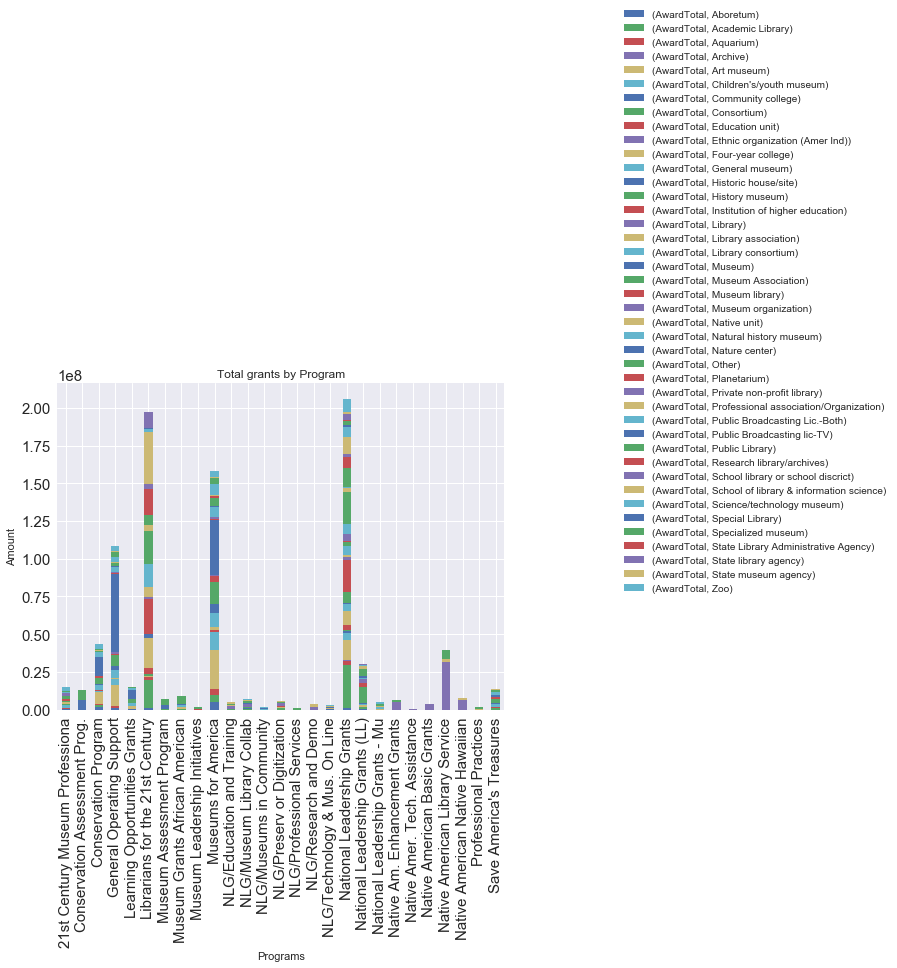

In [43]:
my_plot = cat_group.unstack().plot(kind='bar',stacked = True,title="Total grants by Program", figsize = (8,6))
my_plot.set_xlabel("Programs")
my_plot.set_ylabel("Amount")
ax = plt.subplot(111)
ax.legend(loc='center left', bbox_to_anchor=(1.25, 1.25),
          ncol=1,  shadow=True)

In [6]:
pgm = grants['ProgramType'].unique()
len(pgm)

17

NameError: name 'x' is not defined

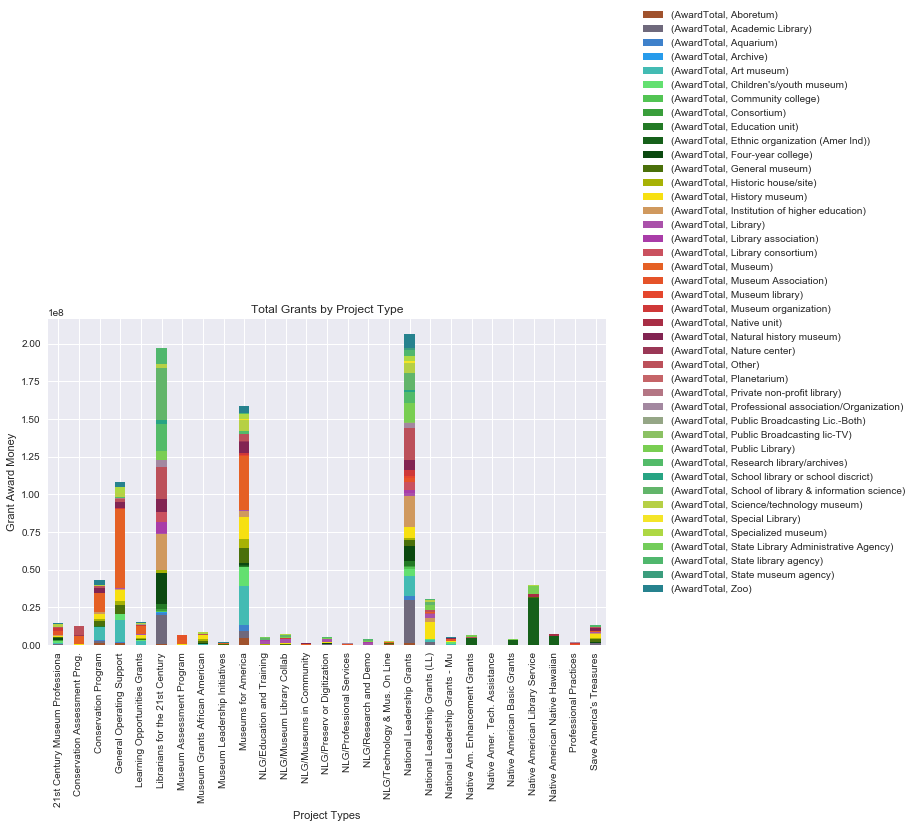

In [168]:
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
pgm = grants['ProgramType'].unique()

listcol = ["#A0522D", "#1E90FF", "#67E568","#257F27","#08420D","#FFF000","#9932CC",
                       "#E56124","#E53E30","#7F2353","#CD5C5C","#9F8CA6","#84d44b","#1fa088","#fde725",
                       "#5ec962","#26828e"]
colors = sns.color_palette("Set1", n_colors=len(pgm))
cmap1 = LinearSegmentedColormap.from_list("my_colormap", listcol)

my_plot = cat_group.unstack().plot(colormap=cmap1,kind='bar',legend = None,stacked=True,title="Total Grants by Project Type", figsize=(10, 6))
my_plot.set_xlabel("Project Types")
my_plot.set_ylabel("Grant Award Money")
ax = plt.subplot(111)
ax.legend(loc='center left', bbox_to_anchor=(1.05, 1.05),
          ncol=1,  shadow=True)
for i in range(20):
   ax.plot(x, y, color = colors[i])

### PART 2 - by YIKAI DENG

In [ ]:
%matplotlib inline
import csv
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
from cartopy.io.img_tiles import OSM
import matplotlib.patches as mpatches
import cartopy.io.shapereader as shpreader

In [ ]:
dataset = open("C://Users//hasee//Desktop//DV//project//DiscGrants.csv", encoding="latin-1")
data_csv= csv.reader(dataset)
header = next(data_csv)

In [ ]:
data = {}
for name in header:
    data[name] = []

for row in data_csv:
    for name, value in zip(header, row):
        data[name].append(value)

In [ ]:
lat=[]
lon=[]
data['Latitude'] = filter(None, data['Latitude'])
data['Longitude'] = filter(None, data['Longitude'])

In [ ]:
lat=list(data['Latitude'])
lon=list(data['Longitude'])

In [ ]:
lats=[]
lons=[]

for item in lat:
    lats.append(float(item))
for item in lon:
    lons.append(float(item))


In [ ]:
lat, lon=43.979, -117.583
dlat, dlon=28, 55
osm_tiles=OSM()

plt.figure(figsize=(15,15))
ax = plt.axes(projection=osm_tiles.crs)
ax.set_extent([lon-dlon,lon+dlon,lat - dlat, lat + dlat])
ax.add_image(osm_tiles,6)
ax.stock_img()

ax.scatter(lons,lats,transform=ccrs.PlateCarree())
plt.show()